<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-12 03:46:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  38.9MB/s    in 5.7s    

2025-09-12 03:46:22 (35.6 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 150.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 191.0 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 125.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 132.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 151.1 MB/s eta 0:00:00


In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


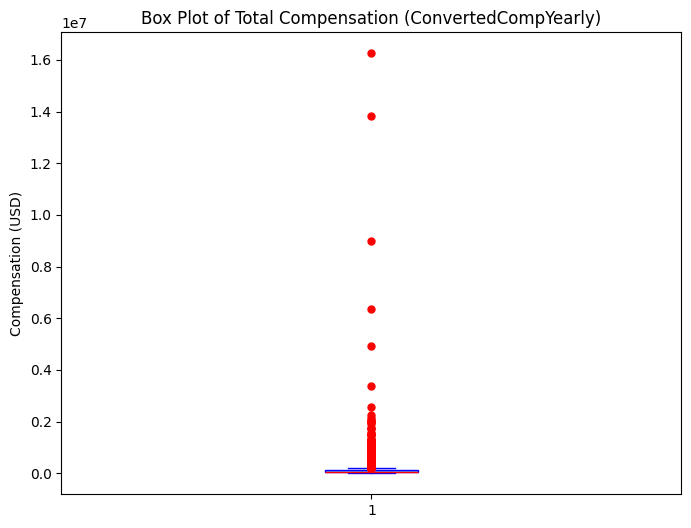

In [9]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query the compensation column (ConvertedCompYearly)
QUERY = """
SELECT ConvertedCompYearly
FROM main
WHERE ConvertedCompYearly IS NOT NULL
"""
df_comp = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Plot a box plot
plt.figure(figsize=(8,6))
plt.boxplot(df_comp['ConvertedCompYearly'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none', markeredgecolor='red'))
plt.title("Box Plot of Total Compensation (ConvertedCompYearly)")
plt.ylabel("Compensation (USD)")
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


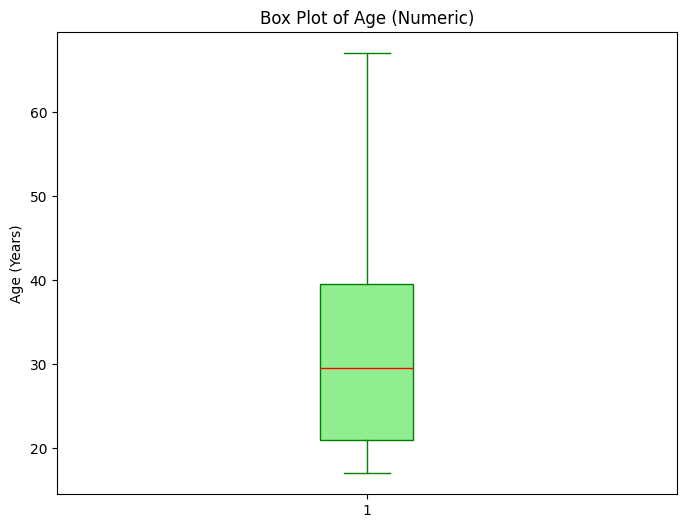

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query the Age column
QUERY = """
SELECT Age
FROM main
WHERE Age IS NOT NULL
"""
df_age = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Map age ranges to numeric midpoints
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67,
    'Prefer not to say': None
}

df_age['AgeNumeric'] = df_age['Age'].map(age_mapping)

# Drop rows with None
df_age = df_age.dropna(subset=['AgeNumeric'])

# Plot box plot
plt.figure(figsize=(8,6))
plt.boxplot(df_age['AgeNumeric'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='green'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='green'),
            capprops=dict(color='green'),
            flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none', markeredgecolor='red'))
plt.title("Box Plot of Age (Numeric)")
plt.ylabel("Age (Years)")
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<Figure size 1200x600 with 0 Axes>

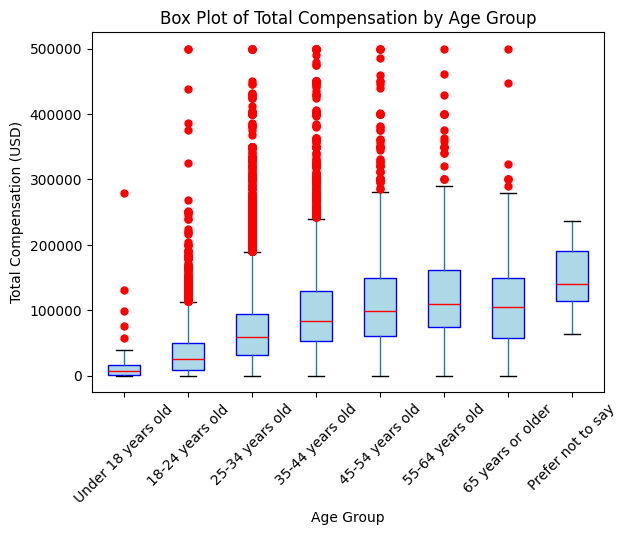

In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query Age and ConvertedCompYearly columns
QUERY = """
SELECT Age, ConvertedCompYearly
FROM main
WHERE Age IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()

# Remove unrealistic compensation values (outliers)
df = df[df['ConvertedCompYearly'] <= 500000]

# Define desired age order
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say'
]

# Convert Age to categorical with a specific order
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Sort dataframe by Age
df = df.sort_values('Age')

# Create boxplot
plt.figure(figsize=(12,6))
df.boxplot(column='ConvertedCompYearly', by='Age', grid=False,
           patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'),
           medianprops=dict(color='red'),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=5,
                           linestyle='none', markeredgecolor='red'))
plt.title("Box Plot of Total Compensation by Age Group")
plt.suptitle("")  # Remove automatic subtitle
plt.xlabel("Age Group")
plt.ylabel("Total Compensation (USD)")
plt.xticks(rotation=45)
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 1200x600 with 0 Axes>

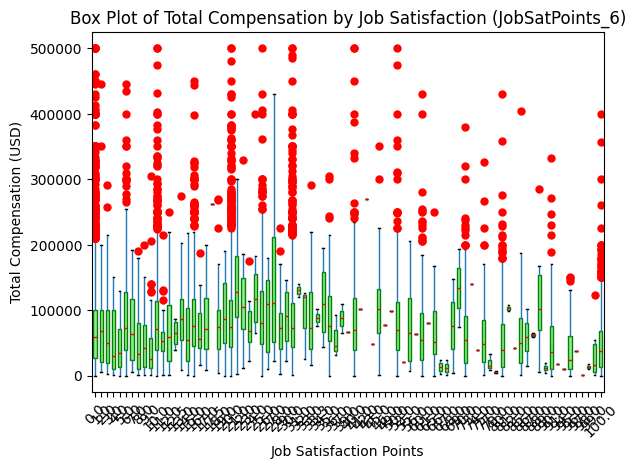

In [13]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query compensation and job satisfaction columns
QUERY = """
SELECT ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE ConvertedCompYearly IS NOT NULL 
  AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the database connection
conn.close()

# Step 4: Optional - remove extreme compensation values (outliers)
df = df[df['ConvertedCompYearly'] <= 500000]  # Adjust upper limit if needed

# Step 5: Sort JobSatPoints_6 for better visualization
df['JobSatPoints_6'] = pd.Categorical(df['JobSatPoints_6'], 
                                      ordered=True, 
                                      categories=sorted(df['JobSatPoints_6'].unique()))

# Step 6: Create the box plot
plt.figure(figsize=(12,6))
df.boxplot(column='ConvertedCompYearly', by='JobSatPoints_6', grid=False, 
           patch_artist=True,
           boxprops=dict(facecolor='lightgreen', color='green'),
           medianprops=dict(color='red'),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none', markeredgecolor='red'))
plt.title("Box Plot of Total Compensation by Job Satisfaction (JobSatPoints_6)")
plt.suptitle("")  # Remove automatic subtitle
plt.xlabel("Job Satisfaction Points")
plt.ylabel("Total Compensation (USD)")
plt.xticks(rotation=45)
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


/tmp/ipykernel_1281/2770947783.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['DevType'] = pd.Categorical(df_top5['DevType'], categories=top5_devtypes, ordered=True)


<Figure size 1200x600 with 0 Axes>

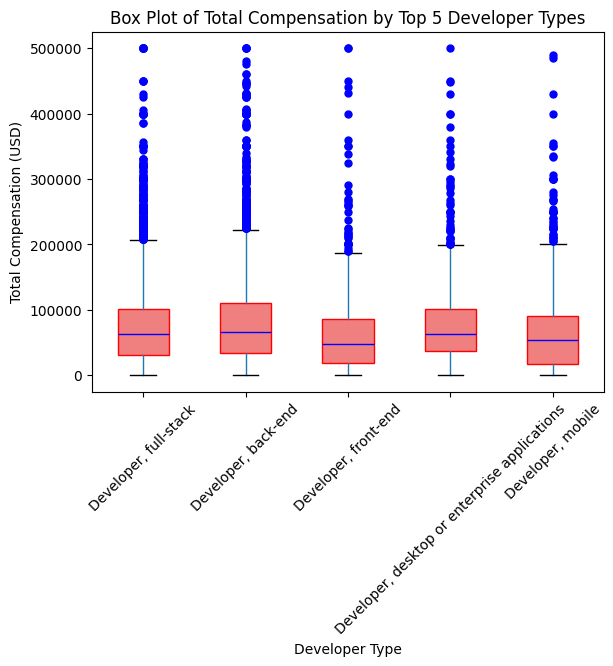

In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query compensation and developer type columns
QUERY = """
SELECT ConvertedCompYearly, DevType
FROM main
WHERE ConvertedCompYearly IS NOT NULL
  AND DevType IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the database connection
conn.close()

# Step 4: Optional - remove extreme compensation values (outliers)
df = df[df['ConvertedCompYearly'] <= 500000]

# Step 5: Select Top 5 Developer Types by frequency
top5_devtypes = df['DevType'].value_counts().head(5).index
df_top5 = df[df['DevType'].isin(top5_devtypes)]

# Step 6: Convert DevType to categorical for correct ordering
df_top5['DevType'] = pd.Categorical(df_top5['DevType'], categories=top5_devtypes, ordered=True)

# Step 7: Create the box plot
plt.figure(figsize=(12,6))
df_top5.boxplot(column='ConvertedCompYearly', by='DevType', grid=False,
                patch_artist=True,
                boxprops=dict(facecolor='lightcoral', color='red'),
                medianprops=dict(color='blue'),
                flierprops=dict(marker='o', markerfacecolor='blue', markersize=5, linestyle='none', markeredgecolor='blue'))
plt.title("Box Plot of Total Compensation by Top 5 Developer Types")
plt.suptitle("")  # Remove automatic subtitle
plt.xlabel("Developer Type")
plt.ylabel("Total Compensation (USD)")
plt.xticks(rotation=45)
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


/tmp/ipykernel_1281/2770947783.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['DevType'] = pd.Categorical(df_top5['DevType'], categories=top5_devtypes, ordered=True)


<Figure size 1200x600 with 0 Axes>

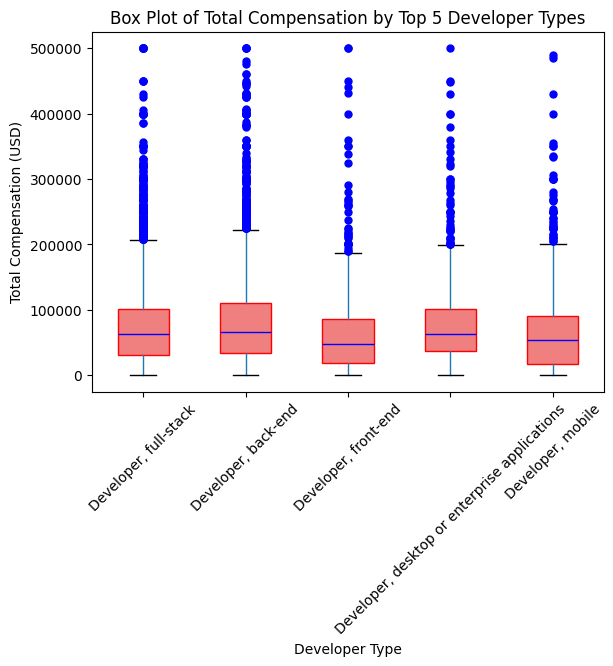

In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query compensation and developer type columns
QUERY = """
SELECT ConvertedCompYearly, DevType
FROM main
WHERE ConvertedCompYearly IS NOT NULL
  AND DevType IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the database connection
conn.close()

# Step 4: Optional - remove extreme compensation values (outliers)
df = df[df['ConvertedCompYearly'] <= 500000]

# Step 5: Select Top 5 Developer Types by frequency
top5_devtypes = df['DevType'].value_counts().head(5).index
df_top5 = df[df['DevType'].isin(top5_devtypes)]

# Step 6: Convert DevType to categorical for correct ordering
df_top5['DevType'] = pd.Categorical(df_top5['DevType'], categories=top5_devtypes, ordered=True)

# Step 7: Create the box plot
plt.figure(figsize=(12,6))
df_top5.boxplot(column='ConvertedCompYearly', by='DevType', grid=False,
                patch_artist=True,
                boxprops=dict(facecolor='lightcoral', color='red'),
                medianprops=dict(color='blue'),
                flierprops=dict(marker='o', markerfacecolor='blue', markersize=5, linestyle='none', markeredgecolor='blue'))
plt.title("Box Plot of Total Compensation by Top 5 Developer Types")
plt.suptitle("")  # Remove automatic subtitle
plt.xlabel("Developer Type")
plt.ylabel("Total Compensation (USD)")
plt.xticks(rotation=45)
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_1281/1209112913.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['Employment'] = pd.Categorical(df_top5['Employment'], categories=top5_employment, ordered=True)


<Figure size 1200x600 with 0 Axes>

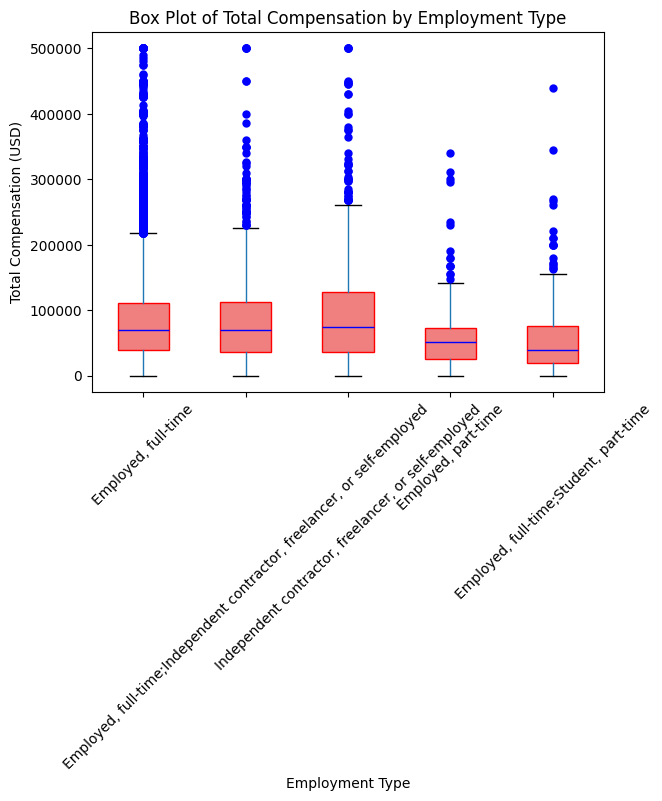

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query compensation and employment type columns
QUERY = """
SELECT ConvertedCompYearly, Employment
FROM main
WHERE ConvertedCompYearly IS NOT NULL
  AND Employment IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the database connection
conn.close()

# Step 4: Remove extreme compensation values (outliers)
df = df[df['ConvertedCompYearly'] <= 500000]

# Step 5: Optional - focus on the top 5 employment types by count
top5_employment = df['Employment'].value_counts().head(5).index
df_top5 = df[df['Employment'].isin(top5_employment)]

# Step 6: Convert Employment to categorical type for ordering
df_top5['Employment'] = pd.Categorical(df_top5['Employment'], categories=top5_employment, ordered=True)

# Step 7: Create the box plot
plt.figure(figsize=(12,6))
df_top5.boxplot(column='ConvertedCompYearly', by='Employment', grid=False,
                patch_artist=True,
                boxprops=dict(facecolor='lightcoral', color='red'),
                medianprops=dict(color='blue'),
                flierprops=dict(marker='o', markerfacecolor='blue', markersize=5, linestyle='none', markeredgecolor='blue'))
plt.title("Box Plot of Total Compensation by Employment Type")
plt.suptitle("")  # Remove automatic subtitle
plt.xlabel("Employment Type")
plt.ylabel("Total Compensation (USD)")
plt.xticks(rotation=45)
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1200x600 with 0 Axes>

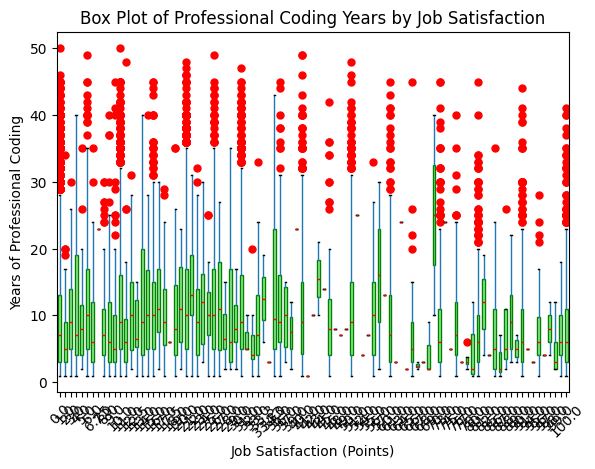

In [17]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query YearsCodePro and JobSatPoints_6
QUERY = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL
  AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the connection
conn.close()

# Step 4: Convert YearsCodePro to numeric (handle ranges like '10-12 years')
def convert_years(value):
    try:
        if '+' in value:
            return float(value.replace('+','').strip())
        elif '-' in value:
            start, end = value.split('-')
            return (float(start.strip()) + float(end.strip())) / 2
        else:
            return float(value)
    except:
        return None

df['YearsCodePro_numeric'] = df['YearsCodePro'].apply(convert_years)
df = df.dropna(subset=['YearsCodePro_numeric', 'JobSatPoints_6'])

# Step 5: Optional: Limit unrealistic high values
df = df[df['YearsCodePro_numeric'] <= 60]  # Assuming max 60 years of experience

# Step 6: Create box plot
plt.figure(figsize=(12,6))
df.boxplot(column='YearsCodePro_numeric', by='JobSatPoints_6', grid=False,
           patch_artist=True,
           boxprops=dict(facecolor='lightgreen', color='green'),
           medianprops=dict(color='red'),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none', markeredgecolor='red'))
plt.title("Box Plot of Professional Coding Years by Job Satisfaction")
plt.suptitle("")  # Remove automatic subtitle
plt.xlabel("Job Satisfaction (Points)")
plt.ylabel("Years of Professional Coding")
plt.xticks(rotation=45)
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
